Machine Learning Clustering

In [1]:
!pip install geemap

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File 

We Selected 3639 samples which are on the boundary of Sweden and 5 features are considered. You can change these as you wish. For visualization  emphasize that this is an unsupervised algorithm, we will leave the true labels ('y') out of the visualization.

In [2]:
import os
import geemap
import pandas as pd
import geopandas as gpd

In [76]:
in_csv = 'Sweden.csv'

In [77]:
df = pd.read_csv(in_csv)
df.head()

,lat,lon,landcover
0,62.510237,11.013455,Water
1,61.844081,11.014209,ForestNaturalAreas
2,61.244031,11.020356,ForestNaturalAreas
3,62.326628,11.022107,AgriculturalArea
4,60.311312,11.026228,Water


In [5]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()
from geemap import Map


# Display the map
Map


geemap.geemap.Map

In [6]:
fc = geemap.pandas_to_ee(df, latitude="lat", longitude="lon")

In [7]:
# Create a Map object
Map = Map()

# Add your feature collection 'fc' to the map
Map.addLayer(fc, {}, "pandas to ee")

# Display the map
Map

Map.addLayer(fc, {}, "pandas to ee")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

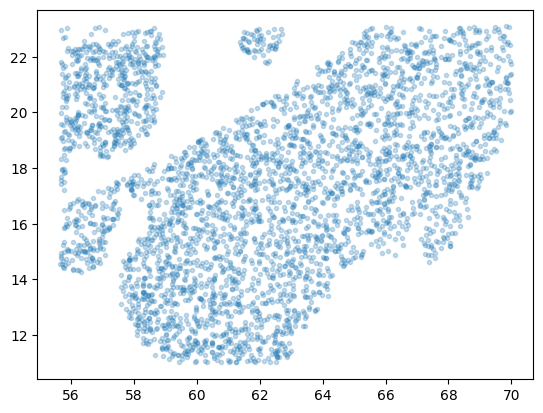

In [80]:
plt.scatter(df["lat"],df["lon"], marker='.',cmap='viridis', alpha=0.25)

By eye, it is relatively easy to pick out the five clusters. The k-means algorithm does this automatically!

## K-means clustering using scikit-learn

It uses k-means++ initialization algorithm. 

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
df1 = pd.DataFrame()
df1["lat"] = df["lat"]
df1["lon"] = df["lon"]
kmeans.fit(df1)
y_kmeans = kmeans.predict(df1)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator

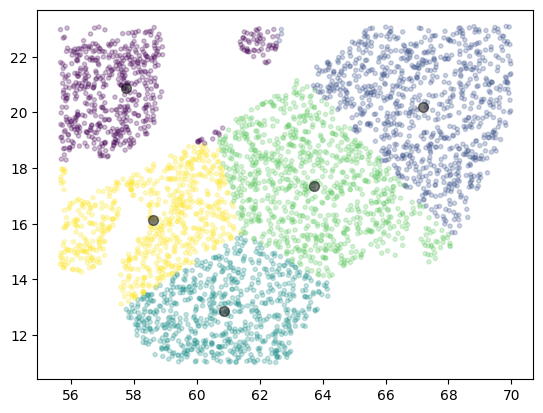

In [84]:
plt.scatter(df["lat"],df["lon"], marker='.', c=y_kmeans[:], cmap='viridis', alpha=0.25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5);

## K-means clustering using Dask

Most estimators in scikit-learn are designed to work on in-memory arrays. Training with larger datasets may require different algorithms. All of the algorithms implemented in Dask-ML work well on larger than memory datasets, which you might store in a dask array or dataframe.

In [85]:
from dask.distributed import Client
client = Client()

In [90]:
import dask.array as da
X = df1.to_numpy()
Xd = da.from_array(X, chunks=1000)
Xd

dask.array<array, shape=(3638, 2), dtype=float64, chunksize=(1000, 2), chunktype=numpy.ndarray>

We’ll use the k-means implemented in Dask-ML to cluster the points. It uses the k-means|| (read: “k-means parallel”) initialization algorithm, which scales better than k-means++. All of the computation, both during and after initialization, can be done in parallel.

In [91]:
import dask_ml.cluster

km = dask_ml.cluster.KMeans(n_clusters=5)
km.fit(Xd)

KMeans(n_clusters=5)

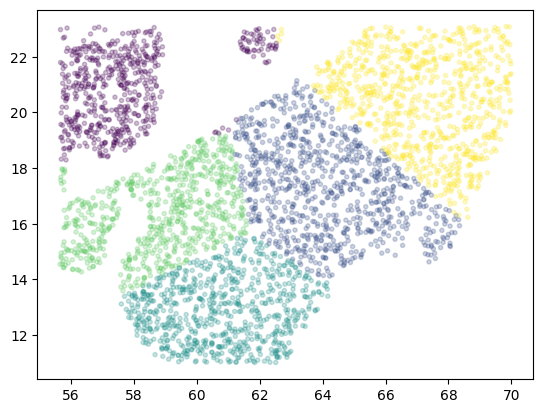

In [92]:
plt.scatter(Xd[:, 0], Xd[:, 1], marker='.', c=km.labels_[:],cmap='viridis', alpha=0.25)

In [93]:
df1 = pd.DataFrame(X)
print(df1)

              0          1
0     62.510237  11.013455
1     61.844081  11.014209
2     61.244031  11.020356
3     62.326628  11.022107
4     60.311312  11.026228
...         ...        ...
3633  66.007066  23.066600
3634  56.887991  23.068208
3635  69.932406  23.074507
3636  68.813967  23.087706
3637  69.834953  23.090489

[3638 rows x 2 columns]


Histograms

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


In [95]:
column_name = 'landcover'


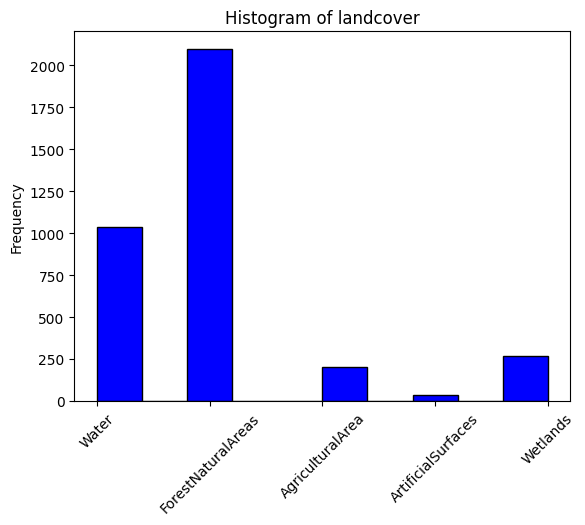

In [97]:
plt.hist(df["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()


In [99]:
df1["label"] = km.labels_
df1["landcover"] = df["landcover"]

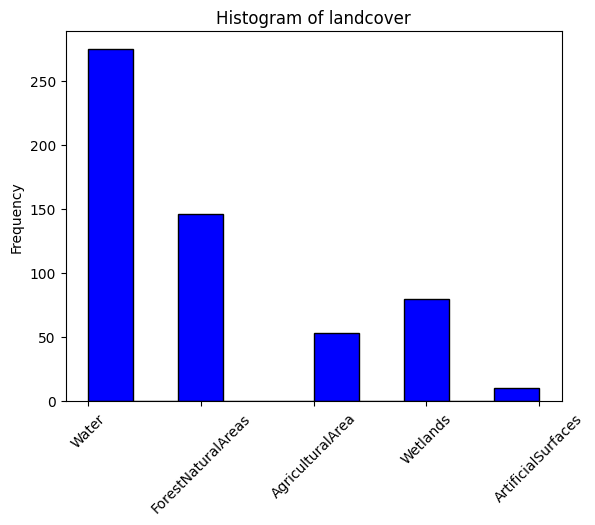

In [100]:
dfC1 = pd.DataFrame()
dfC1 = df1.loc[df1["label"]==0]
plt.hist(dfC1["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()

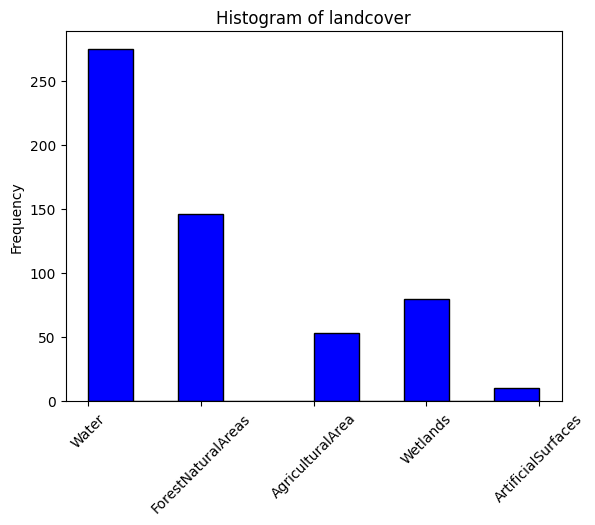

In [101]:
dfC2 = pd.DataFrame()
dfC2 = df1.loc[df1["label"]==1]
plt.hist(dfC1["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()

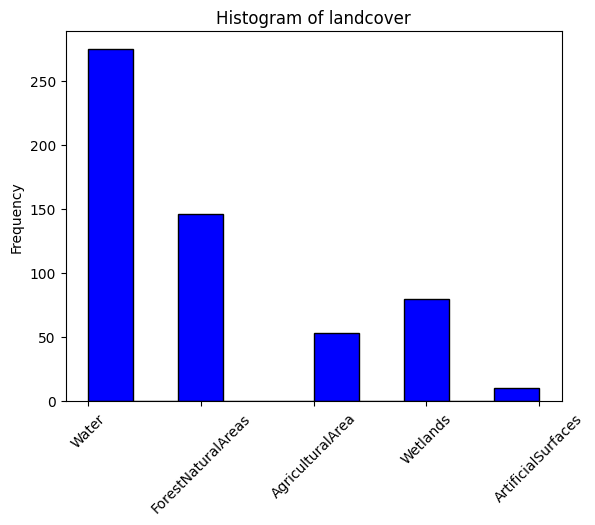

In [102]:
dfC3 = pd.DataFrame()
dfC3 = df1.loc[df1["label"]==2]
plt.hist(dfC1["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()

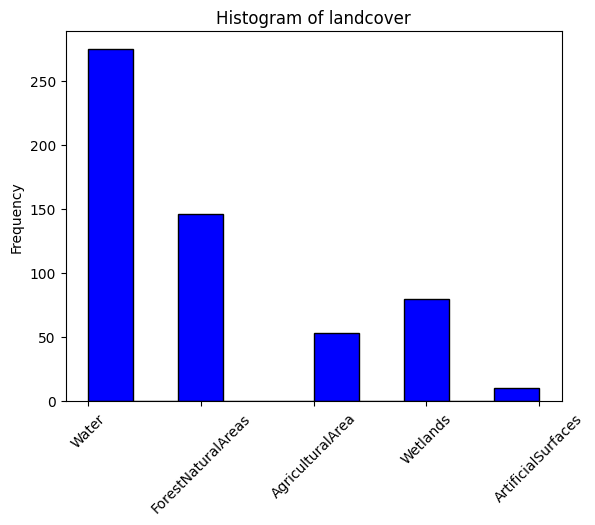

In [103]:
dfC4 = pd.DataFrame()
dfC4 = df1.loc[df1["label"]==3]
plt.hist(dfC1["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()

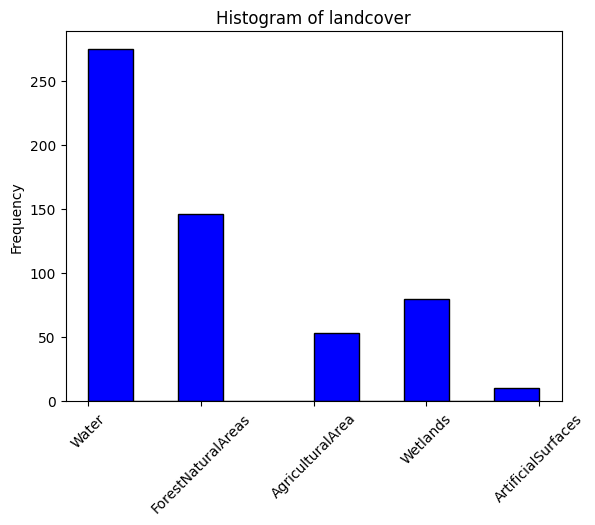

In [104]:
dfC5 = pd.DataFrame()
dfC5 = df1.loc[df1["label"]==4]
plt.hist(dfC1["landcover"], bins=10, color='blue', edgecolor='black')
x_labels = [label[:10] + '\n' + label[2:] if len(label) > 10 else label for label in data[column_name]]
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()

In [105]:
plt.savefig('histogram.png')


<Figure size 640x480 with 0 Axes>

Discussion:

    Unsupervised classification method uses an automatic algorithm t separate the groups of values. In other words, at the first the user does not have any role in classification and indeed the machine make clusters regarding their values. So. it has to be necessary to educate the machine that what is this. In this project, we trained the machine using some training sample points belongs to different land covers. Using these training data the machine predict that other points belong to which group based on the distance of each value to the center of the groups.
    If the machine is trained using sample points of region X, applying the classifier in the region Y with the same number of land covers seems to be useful because the values of the points in each land cover follow a relatively same pattern. But it should be accounted that it is not always completely true. For example, the values belonged to forests in Sweden do not represent the forest in Spain because of the different values related to structure, species or radiations. 
    In addition, assuming that there are more land covers in the region Y, using the mentioned classifier which is learned based of the 5 classes, result in that some land covers will be merged. For examples, deep water and shallow water, or forests and grasslands may be merged as one cluster.
    Addressing computational time, the determining factors are the number of training sample points, the number of predefined clusters, the size of the study area which is defined so the machine classify the values. About the first, increasing the training data although raise the accuracy but also raise the computation time. In addition, the higher number of clusters, the higher computational time due to the fact that the machine continuously calculate the potential centers of each cluster. 
    
    
    Hanie - Ali